### Implementation of the Algorithm given in [Link](http://pages.cs.wisc.edu/~dsmyers/cs547/simulation_handout.pdf)

In [1]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import pandas as pd
import random

In [16]:
N = 1000                     # Number of patients in this session 
arrival_mean = 20          # arrival time mean
arrival_std_dev = 4        # arrival time std deviation
service_mean = 18         # service time mean
service_std_dev = 3         # service time std deviation

age_mean = 37
age_std_dev = 10  

# using inverseCDF method to generate random values
q = np.random.rand(N)
inter_arrival_time = stats.norm.ppf(q, 
                                    loc=arrival_mean, 
                                    scale=arrival_std_dev)
service_time = stats.norm.ppf(q, 
                              loc=service_mean, 
                              scale=service_std_dev)

age = stats.norm.ppf(q, 
                      loc=age_mean, 
                      scale=age_std_dev)

gender = np.random.choice([1, 2, 3], N, p=[0.4, 0.5, 0.1])


actual_arrival_time = [inter_arrival_time[0]]
enter_service = [actual_arrival_time[0]]
completion = [enter_service[0] + service_time[0]]

# Actual Generation
for i in range(1, N):
    actual_arrival_time.append(actual_arrival_time[i-1] + inter_arrival_time[i])
    enter_service.append(max(actual_arrival_time[i], completion[i-1]))
    completion.append(enter_service[i] + service_time[i])


In [17]:
df = {
    'age': age,
    'gender': gender,
#     'inter_arrival': inter_arrival_time,
    'actual_arrival_time': actual_arrival_time,
    'enter_service': enter_service,
    'service_time': service_time,
    'completion': completion,
}
df = pd.DataFrame(df)
df['wait_time'] = df['enter_service'] - df['actual_arrival_time']
position = []
for i in range(N):
    arrival_time = df.iloc[i].actual_arrival_time
    position.append(len(
       df[df['actual_arrival_time'] < arrival_time][df['completion'] > arrival_time]
    ))
df['position'] = position

<ipython-input-17-93a30468695a>:16: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df[df['actual_arrival_time'] < arrival_time][df['completion'] > arrival_time]


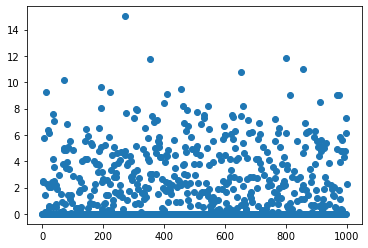

In [18]:
plt.scatter(range(len(df['wait_time'])), df['wait_time'])

(array([  8.,  47., 112., 186., 226., 215., 130.,  52.,  19.,   5.]),
 array([ 9.68308208, 11.4484265 , 13.21377091, 14.97911532, 16.74445974,
        18.50980415, 20.27514856, 22.04049298, 23.80583739, 25.57118181,
        27.33652622]),
 <a list of 10 Patch objects>)

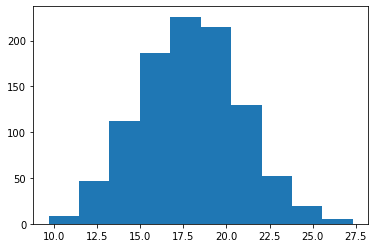

In [19]:
plt.hist(df['service_time'])

In [20]:
max_wait_time = max(df['wait_time'])
avg_wait_time = np.mean(df['wait_time'])

print(f"Average Wait time: {avg_wait_time}")
print(f"Maximum Wait time: {max_wait_time}")

Average Wait time: 1.5040186922798788
Maximum Wait time: 15.016551160362724


In [21]:
df.head()

,age,gender,actual_arrival_time,enter_service,service_time,completion,wait_time,position
0,35.283297,1,19.313319,19.313319,17.484989,36.798308,0.000000,0
1,56.510351,1,47.117459,47.117459,23.853105,70.970564,0.000000,0
2,40.431961,1,68.490244,70.970564,19.029588,90.000153,2.480321,1
3,47.900456,2,92.850426,92.850426,21.270137,114.120562,0.000000,0
4,34.160123,2,111.714475,114.120562,17.148037,131.268599,2.406088,1


In [22]:
df.drop(['enter_service', 'completion', 'wait_time'], axis=1, inplace=True)

In [23]:
df.to_csv('training.csv')